<a href="https://colab.research.google.com/github/hasanalay/ML/blob/main/zaman_serisi_pratik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis with Prophet

Prophet kütüphanesi, tek değişkenli zaman serisi veri kümeleri için tahminler yapmak için tasarlanmış açık kaynaklı bir kütüphanedir. Kullanımı kolaydır ve varsayılan olarak trendler ve mevsimsel yapıya sahip veriler için tahminler yapmak amacıyla model için iyi bir hiperparametre kümesini otomatik olarak bulmak üzere tasarlanmıştır.

## Kurulumlar

Bu projeyi gerceklestirmek icin asagidaki kutuphanelere ihtiyaciniz vardir:
- fbprophet
- pandas
- matplotlib
- plotly (Zorunlu degil fakat prophet bazi durumlarda ihtiyaci olacak)
- scikit-learn

Gerekli kutuphane kurulumlarini asagidaki kod satirini calistirarak tamamlayabilirsiniz.

`pip install fbprophet pandas matplotlib plotly scikit-learn`

## Dataset

[Monthly Car Sales Dataset](https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv)

Ayni zamanda [bu linkten](https://github.com/jbrownlee/Datasets/) onlarca farkli datasete ulasabilirsiniz

## Kaynak
Machine Learning Mastery Facebook Prophet ile basit zaman serisi egitimi. [Kaynak](https://machinelearningmastery.com/time-series-forecasting-with-prophet-in-python/)

# Baslayalim

Elimizdeki dataseti uc farkli sekilde inceleyecegiz: 
- oncelikle modelin egitildi veri seti ile egiterek modelin genel performansina bakacagiz
- elimizdeki orneklerle gelecek yil icin bir tahminde bulunacagiz
- elimizdeki verinin son bir yilini test icin ayirip bu kismi tahmin edip gercek degerler ile karsilastiracagiz

### Verinin Iceri Aktarilmasi

Aylık araba satışları veri setini kullanacağız.

Hem trend hem de mevsimsellik içeren standart bir tek değişkenli zaman serisi veri setidir. Veri kümesi 108 aylık veriye sahiptir.

In [12]:
pip install fbprophet pandas matplotlib plotly scikit-learn

In [13]:
import pandas as pd
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header = 0)

print(df.shape)
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


### Verinin Gorsellestirilmesi

Bir zaman serisini çizmek, aslında bir trend, mevsimsel bir döngü, aykırı değerler ve daha fazlası olup olmadığını görmemize yardımcı olur. Bize veriler için bir fikir verir.

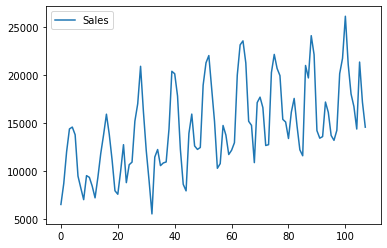

In [14]:
from matplotlib import pyplot

df.plot()
pyplot.show()

Satışların zaman içindeki eğilimini ve satışlarda aylık mevsimsel bir deseni açıkça görebiliriz. Bunlar, tahmin modelinin dikkate almasını beklediğimiz kalıplardır.

### Veri Tipi Donusumu

DataFrame belirli biçimi olmalıdır. İlk sütun **ds** adına sahip olmalı ve tarih-saatleri içermelidir. İkinci sütun **y** adına sahip olmalı ve gözlemleri içermelidir.

In [15]:
df.dtypes             #date stunundaki veri tipini objec'ten datetime formatına çerimemiz gerek.

Month    object
Sales     int64
dtype: object

In [16]:
df.columns = ['ds', 'y']                      
df['ds']= pd.to_datetime(df['ds'])          # burada gerekli dönüşümü yaptık

In [17]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

### Modelin Olusturulmasi

Prophet'i tahmin için kullanmak için, önce bir Prophet() nesnesi tanımlanır ve yapılandırılır, ardından fit() işlevi çağrılarak ve veriler geçirilerek veri kümesine sığdırılır.

Model hemen hemen her şeyi otomatik olarak çözmek için çalışacaktır.

In [18]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Ornek Ici Tahmin Yapmak

Geçmiş veriler üzerinden bir tahmin yapmak faydalı olabilir.

Yani, modeli eğitmek için girdi olarak kullanılan veriler üzerinde bir tahmin yapabiliriz. İdeal olarak, model verileri daha önce görmüştür ve mükemmel bir tahminde bulunur.

Buna örnek içi (eğitim kümesi örneğinde) tahmin yapmak denir ve sonuçların gözden geçirilmesi modelin ne kadar iyi olduğuna dair fikir verebilir. Yani eğitim verilerini ne kadar iyi öğrendiğidir.

predict() işlevi çağrılarak ve tahmin edilecek tüm aralıklar için 'ds' adlı bir sütun ve tarih-saat içeren satırlar içeren bir DataFrame geçirilerek bir tahmin yapılır.

Bu "tahmin" DataFrame'i yaratmanın birçok yolu vardır. Bu durumda, bir yıllık tarihler arasında döngü yapacağız, ör. veri kümesindeki son 12 ay ve her ay için bir dize oluşturun. Daha sonra tarih listesini bir DataFrame'e dönüştüreceğiz ve dize değerlerini tarih-saat nesnelerine dönüştüreceğiz.

In [19]:
future = list()

for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
forecast = model.predict(future)


In [20]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12798.021806  15925.903820
1 1968-02-01  14905.955964  13269.465113  16410.266936
2 1968-03-01  20842.150502  19137.147074  22391.886490
3 1968-04-01  22870.095215  21414.431667  24421.026030
4 1968-05-01  24176.211162  22623.884076  25758.067725


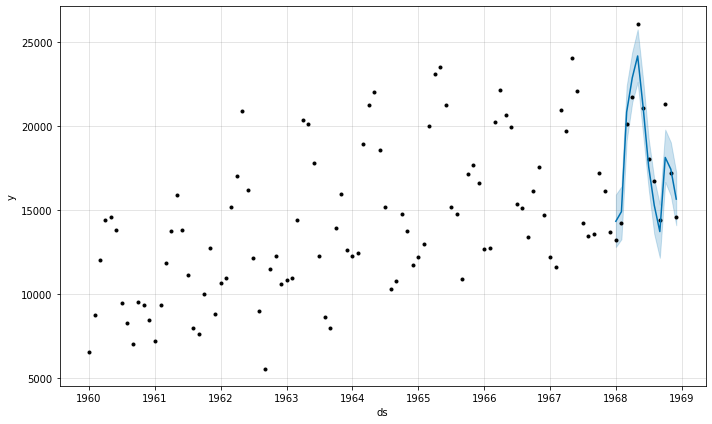

In [21]:
model.plot(forecast)
pyplot.show()

predict() işlevinin sonucu, birçok sütun içeren bir DataFrame'dir. 

En önemli sütunlar:
- tahmin tarih saat **('ds')** 
- tahmin değeri **('yhat')** 
- tahmin edilen değerin üzerinde alt ve üst sınırları **('yhat_lower' ve 'yhat_upper')**

Örneğin, ilk birkaç tahmini şu şekilde yazdırabiliriz:

In [23]:
future = list()

for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
    
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])

forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13806.678177  16823.401736
1 1969-02-01  16142.271673  14582.962073  17771.117492
2 1969-03-01  21351.832640  19789.944403  22932.907645
3 1969-04-01  23477.889811  21814.936451  24973.533303
4 1969-05-01  24988.440907  23415.109645  26555.306929


### Tahminlerin Cizdirilmesi

Bu, modelde plot() işlevi çağrılarak ve bir sonuç DataFrame'e aktarilarak elde edilebilir. 

Asagidaki kod eğitim veri kümesinin bir grafiğini oluşturacak ve tahmin, tahmin tarihleri için üst ve alt sınırlarli gosterecektir.

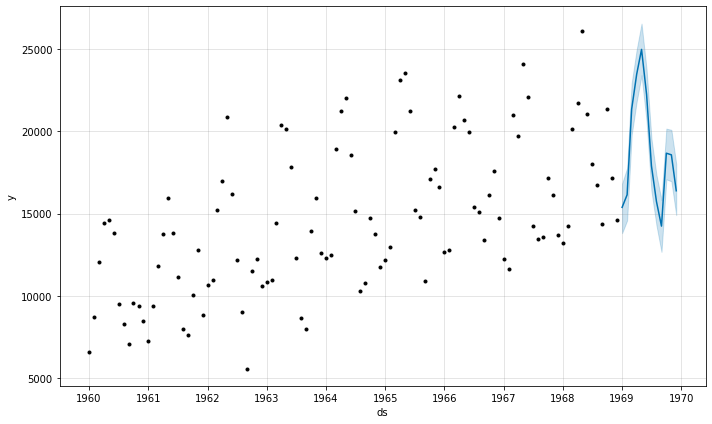

In [24]:
model.plot(forecast)
pyplot.show()

## Ornek Disi Tahmin Yapmak

Pratikte, eğitim verilerinin ötesinde bir tahmin yapmak için bir tahmin modeli isteriz.

Buna örnek dışı tahmin denir.

Bunu bir örnek içi tahminle aynı şekilde başarabilir ve basitçe farklı bir tahmin dönemi belirleyebiliriz.

Bu durumda, 1969-01'den başlayarak eğitim veri kümesinin sonunun ötesinde bir dönem tahmin etmeyi deneyelim.

## Modeli Manuel Degerlendirmek

Bir tahmin modelinin performansının objektif bir tahminini geliştirmek çok önemlidir.

Bu, son 12 ay gibi bazı verileri modelden uzak tutarak başarılabilir. Ardından, modelin verilerin ilk kısmına uydurulması, tutulan paket kısmı üzerinde tahminler yapmak için kullanılması ve tahminlerdeki ortalama mutlak hata gibi bir hata ölçüsünün hesaplanması. Örneğin, simüle edilmiş bir örneklem dışı tahmin.

Skor, örneklem dışı bir tahmin yaparken modelin ortalama olarak ne kadar iyi performans göstermesini bekleyebileceğimize dair bir tahmin verir.

Bunu , son 12 ayı kaldırılmış eğitim için yeni bir DataFrame oluşturarak örnek verilerle yapabiliriz .

## [kaynak](https://www.youtube.com/watch?v=gX6nZ7IINu8&t=42s)